In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# read the image
img = cv2.imread('images/topview.jpg')

In [12]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
# calculate histogram of original image
gray_image_histogram = cv2.calcHist(images=[gray_image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

In [20]:
# gamma values
gamma_values = [0.1, 0.5, 0.9, 2, 5, 8]

# 0 < gamma < 1 enhances contrast (darker regions become darker, brighter regions become brighter).
# gamma > 1 decreases contrast (image appears more washed out).

Text(0.5, 1.0, 'Histogram of Original Image')

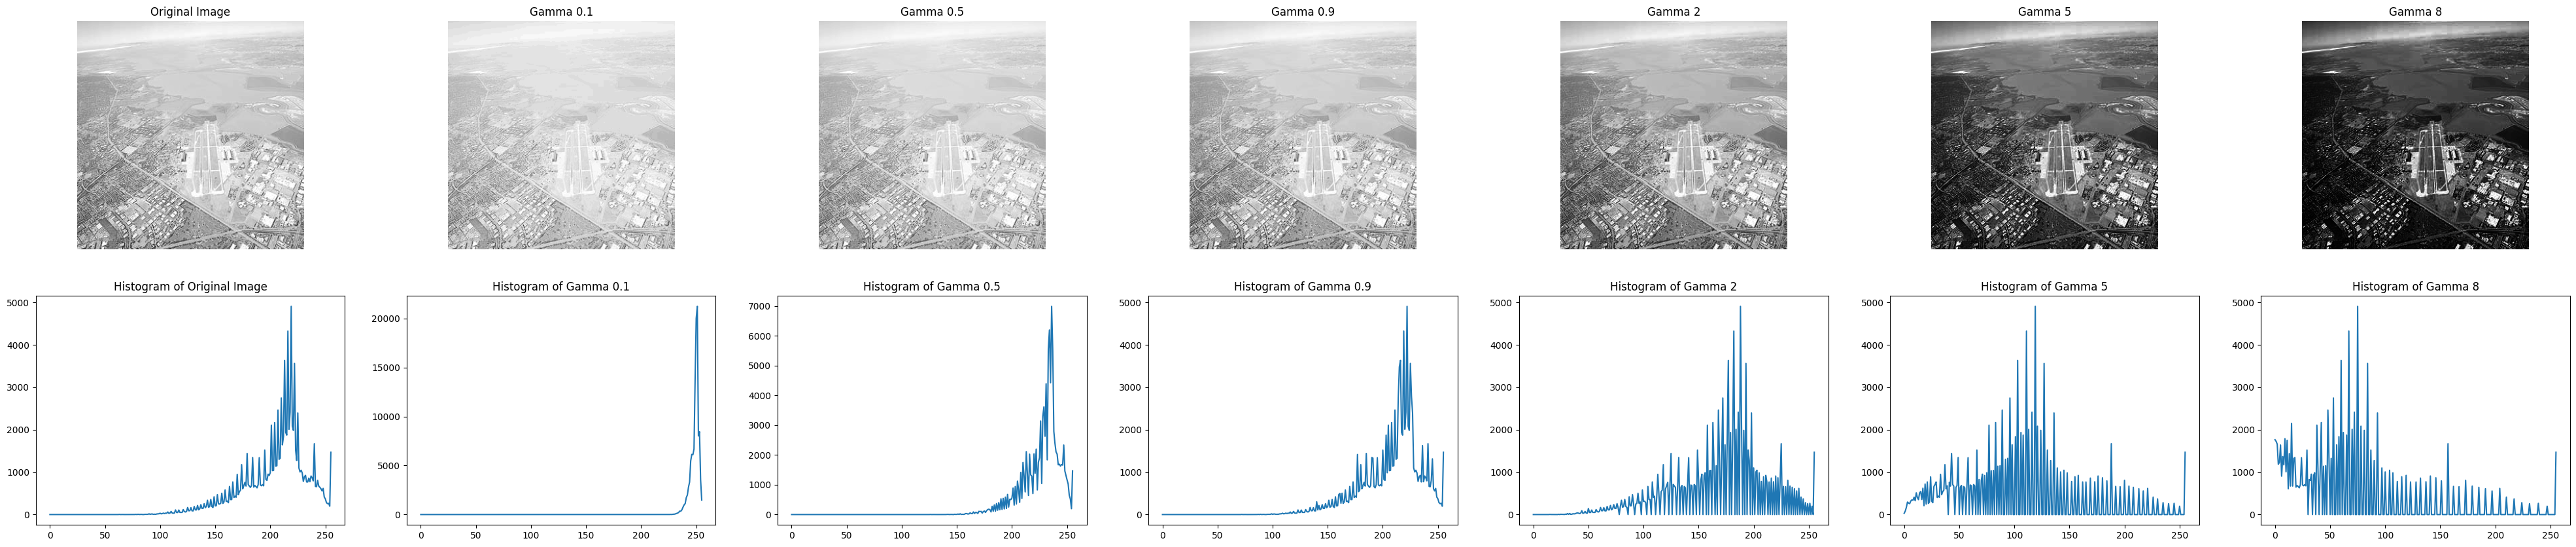

In [23]:
fig, axes = plt.subplots(2, 7, figsize=(50, 10))

for i, gamma in enumerate(gamma_values):
    # Apply gamma correction to image
    # Convert pixel values from the range [0, 255] to [0, 1]
    gamma_corrected = np.array(255 * (gray_image / 255) ** gamma, dtype='uint8')

    # Plot the image in the corresponding subplot
    axes[0][i+1].imshow(gamma_corrected, cmap='gray')
    axes[0][i+1].set_title(f'Gamma {gamma}')
    axes[0][i+1].axis('off')

    # Calculate the histogram
    histogram = cv2.calcHist([gamma_corrected], [0], None, [256], [0, 256])
    axes[1][i+1].set_title(f'Histogram of Gamma {gamma}')
    axes[1][i+1].plot(histogram)


axes[0][0].imshow(gray_image, cmap='gray')
axes[0][0].set_title(f'Original Image')
axes[0][0].axis('off')

axes[1][0].plot(gray_image_histogram)
axes[1][0].set_title(f'Histogram of Original Image')

# Local Gamma Correction

In [26]:
# read the image
image = cv2.imread('images/street.jpg')

Text(0.5, 1.0, 'Local Gamma Correction')

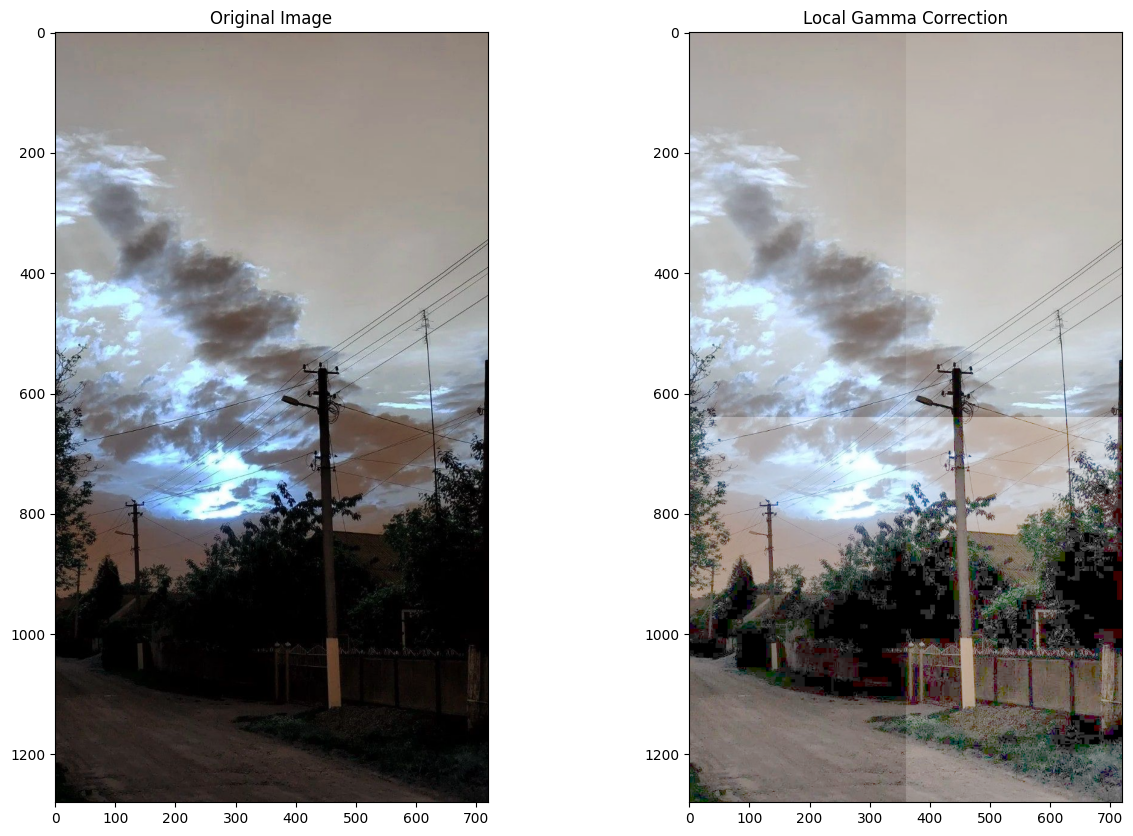

In [43]:
# Height and width of the image
height, width, channel = image.shape

# Divide into four equal parts
top_left = image[:height//2, :width//2]
top_right = image[:height//2, width//2:]
bottom_left = image[height//2:, :width//2]
bottom_right = image[height//2:, width//2:]

# Define the size of the arrays and the value
array_size = (height//2, width//2)  # Adjust the dimensions as needed

# Create arrays filled with the same value
top_left_gamma_array = np.full(top_left.shape, 0.7)
top_right_gamma_array = np.full(top_right.shape, 0.6)
bottom_left_gamma_array = np.full(bottom_left.shape, 0.4)
bottom_right_gamma_array = np.full(bottom_right.shape, 0.3)


# Combine the top and bottom halves
top_half = np.hstack((top_left_gamma_array, top_right_gamma_array))
bottom_half = np.hstack((bottom_left_gamma_array, bottom_right_gamma_array))
final_gamma = np.vstack((top_half, bottom_half)) # Combine the full image

# Merge parts using np.block if we have gray scale image
# final_gamma = np.block([[top_left_gamma_array, top_right_gamma_array], [bottom_left_gamma_array, bottom_right_gamma_array]])

local_gamma_corrected_image = np.array(255 * (image / 255) ** final_gamma, dtype='uint8')

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(image)
axes[0].set_title("Original Image")

axes[1].imshow(local_gamma_corrected_image)
axes[1].set_title("Local Gamma Correction")

# Smooth Gamma Corrected Borders

Text(0.5, 1.0, 'Gaussin Filter of Gamma Mask')

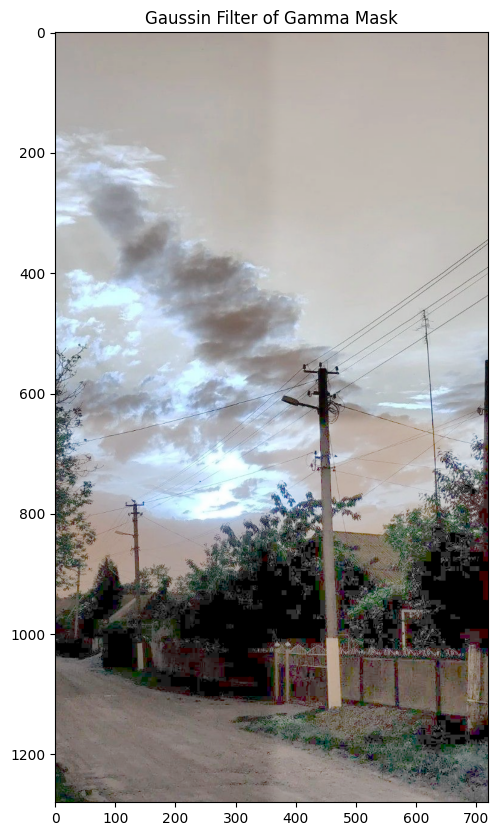

In [ ]:
# Define the kernel size (must be odd, e.g., 5, 7, 9)
kernel_size = 33

# Apply gaussian filter to final gamma mask
blurred_final_gamma = cv2.GaussianBlur(final_gamma, (kernel_size, kernel_size), 10)
local_blurred_gamma_corrected_image = np.array(255 * (image / 255) ** blurred_final_gamma, dtype='uint8')

plt.figure(figsize=(7, 10))
plt.imshow(local_blurred_gamma_corrected_image, cmap='gray')
plt.title('Gaussin Filter of Gamma Mask')

Text(0.5, 1.0, 'Mean Filter of Gamma Mask')

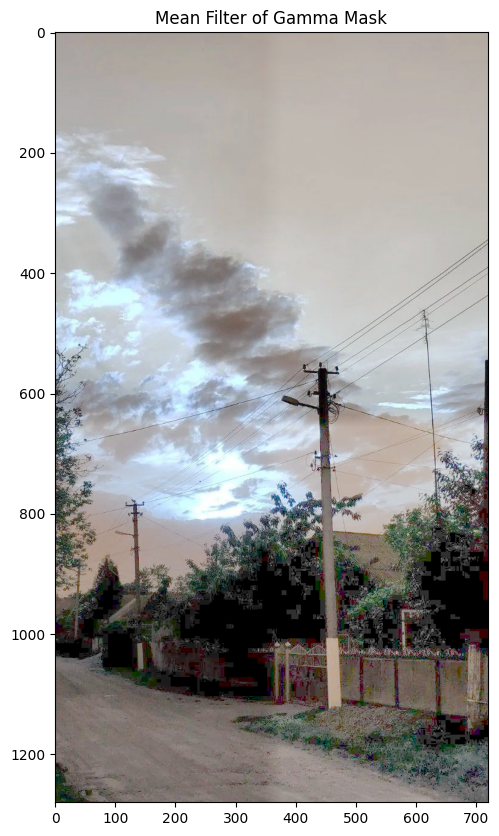

In [ ]:
# Define the kernel size (must be odd, e.g., 5, 7, 9)
kernel_size = 33

# Apply mean filter to final gamma mask
blurred_final_gamma = cv2.blur(final_gamma, (kernel_size, kernel_size))
local_blurred_gamma_corrected_image = np.array(255 * (image / 255) ** blurred_final_gamma, dtype='uint8')

plt.figure(figsize=(7, 10))
plt.imshow(local_blurred_gamma_corrected_image, cmap='gray')
plt.title('Mean Filter of Gamma Mask')